In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

images = [image for image in os.listdir('rolex_out') if image.endswith('.jpg')]
txt = [image for image in os.listdir('rolex_out') if image.endswith('.txt')]

In [2]:
def brightness(img, low, high):
    value = random.uniform(low, high)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255]  = 255
    hsv[:,:,2] = hsv[:,:,2]*value 
    hsv[:,:,2][hsv[:,:,2]>255]  = 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img

In [3]:
def horizontal_shift(img, ratio=0.0):
    if ratio > 1 or ratio < 0:
        print('Value should be less than 1 and greater than 0')
        return img
    ratio = random.uniform(-ratio, ratio)
    h, w = img.shape[:2]
    to_shift = w*ratio
    if ratio > 0:
        img = img[:, :int(w-to_shift), :]
    if ratio < 0:
        img = img[:, int(-1*to_shift):, :]
    img = fill(img, h, w)
    return img

In [4]:
def fill(img, h, w):
    img = cv2.resize(img, (w, h), cv2.INTER_CUBIC)
    return img

def vertical_shift(img, ratio=0.0):
    if ratio > 1 or ratio < 0:
        print('Value should be less than 1 and greater than 0')
        return img
    ratio = random.uniform(-ratio, ratio)
    h, w = img.shape[:2]
    to_shift = h*ratio
    if ratio > 0:
        img = img[:int(h-to_shift), :, :]
    if ratio < 0:
        img = img[int(-1*to_shift):, :, :]
    img = fill(img, h, w)
    return img

In [5]:
def zoom(img, value):
    if value > 1 or value < 0:
        print('Value for zoom should be less than 1 and greater than 0')
        return img
    value = random.uniform(value, 1)
    h, w = img.shape[:2]
    h_taken = int(value*h)
    w_taken = int(value*w)
    h_start = random.randint(0, h-h_taken)
    w_start = random.randint(0, w-w_taken)
    img = img[h_start:h_start+h_taken, w_start:w_start+w_taken, :]
    img = fill(img, h, w)
    return img

In [6]:
def channel_shift(img, value):
    value = int(random.uniform(-value, value))
    img = img + value
    img[:,:,:][img[:,:,:]>255]  = 255
    img[:,:,:][img[:,:,:]<0]  = 0
    img = img.astype(np.uint8)
    return img

In [7]:
def horizontal_flip(img, flag):
    if flag:
        return cv2.flip(img, 1)
    else:
        return img

In [8]:
def vertical_flip(img, flag):
    if flag:
        return cv2.flip(img, 0)
    else:
        return img

In [9]:
def rotation(img, angle):
    angle = int(random.uniform(-angle, angle))
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)
    img = cv2.warpAffine(img, M, (w, h))
    return img

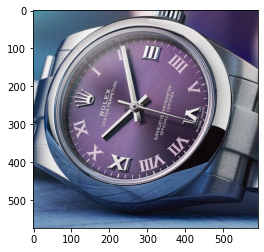

In [10]:
img = cv2.imread('rolex_out/' + images[0])
plt.imshow(img)

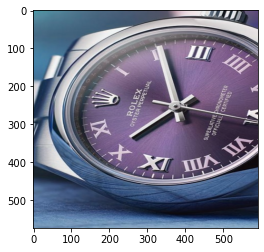

In [11]:
img_tmp = horizontal_shift(img, 0.3)
plt.imshow(img_tmp)

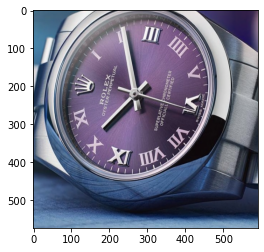

In [12]:
img_tmp = vertical_shift(img, 0.3)
plt.imshow(img_tmp)

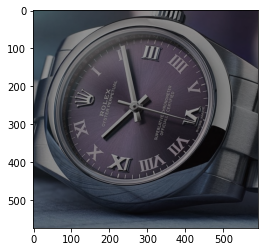

In [13]:
img_tmp = brightness(img, 0.5, 0.7)
plt.imshow(img_tmp)

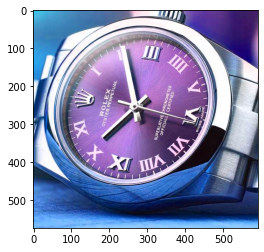

In [14]:
img_tmp = brightness(img, 1.3, 2.0)
plt.imshow(img_tmp)

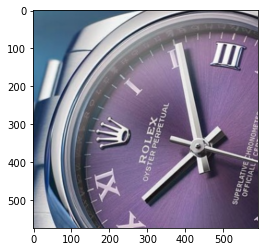

In [15]:
img_tmp = zoom(img, 0.5)
plt.imshow(img_tmp)

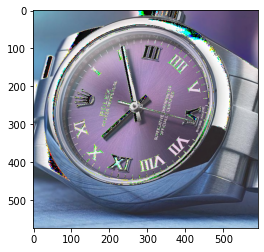

In [16]:
img_tmp = channel_shift(img, -80)
plt.imshow(img_tmp)

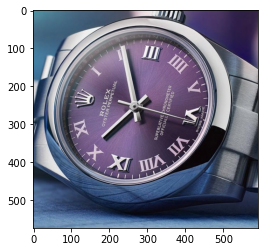

In [17]:
img_tmp = channel_shift(img, 10)
plt.imshow(img_tmp)

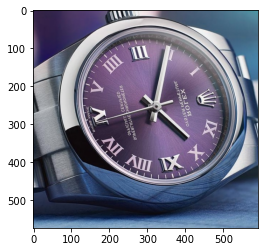

In [18]:
img_tmp = horizontal_flip(img, True)
plt.imshow(img_tmp)

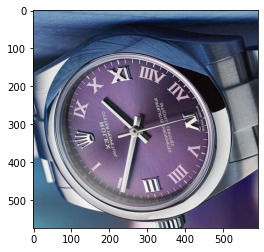

In [19]:
img_tmp = vertical_flip(img, True)
plt.imshow(img_tmp)

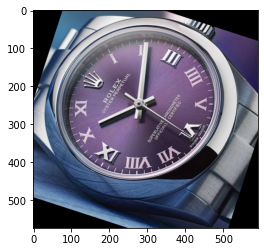

In [20]:
img_tmp = rotation(img, 45)
plt.imshow(img_tmp)

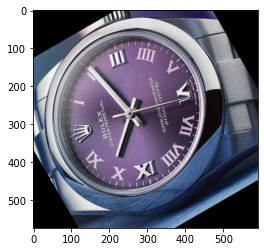

In [21]:
img_tmp = rotation(img, -45)
plt.imshow(img_tmp)

In [26]:
files = []
labels = []
for image in images:
    img = cv2.imread('rolex_out/' + image)
    with open('rolex_out/'+ image.replace('jpg', 'txt'), 'r') as f:
        label = f.read().lower()
    img_tmp = horizontal_shift(img, 0.3)
    cv2.imwrite('rolex_out/' + image[:-4] + "_01.jpg", img_tmp)
    img_tmp = vertical_shift(img, 0.3)
    cv2.imwrite('rolex_out/' + image[:-4] + "_02.jpg", img_tmp)
    img_tmp = brightness(img, 0.5, 0.7)
    cv2.imwrite('rolex_out/' + image[:-4] + "_03.jpg", img_tmp)
    img_tmp = brightness(img, 1.3, 2.0)
    cv2.imwrite('rolex_out/' + image[:-4] + "_04.jpg", img_tmp)
    img_tmp = zoom(img, 0.5)
    cv2.imwrite('rolex_out/' + image[:-4] + "_05.jpg", img_tmp)
    img_tmp = channel_shift(img, -80)
    cv2.imwrite('rolex_out/' + image[:-4] + "_06.jpg", img_tmp)
    img_tmp = channel_shift(img, 10)
    cv2.imwrite('rolex_out/' + image[:-4] + "_07.jpg", img_tmp)
    img_tmp = horizontal_flip(img, True)
    cv2.imwrite('rolex_out/' + image[:-4] + "_08.jpg", img_tmp)
    img_tmp = vertical_flip(img, True)
    cv2.imwrite('rolex_out/' + image[:-4] + "_09.jpg", img_tmp)
    img_tmp = rotation(img, 45)
    cv2.imwrite('rolex_out/' + image[:-4] + "_10.jpg", img_tmp)
    img_tmp = rotation(img, -45)
    cv2.imwrite('rolex_out/' + image[:-4] + "_11.jpg", img_tmp)
    
    for i in range(1, 10):
        files.append(image [:-4] + f"_0{i}.jpg")
        labels.append(label)
    for i in range(10, 12):
        files.append(image [:-4] + f"_{i}.jpg")
        labels.append(label)
    

In [29]:
import pandas as pd
df = pd.DataFrame({"path": files, "label": labels })

In [33]:
df.sample(5)

,path,label
2559,2018-01-20_17-00-05_UTC_08.jpg,sky-dweller
636,2017-01-08_14-30-03_UTC_10.jpg,gmt-master
982,2018-08-23_16-04-58_UTC_04.jpg,submariner
2735,2018-11-13_16-00-01_UTC_08.jpg,gmt-master
1297,2016-03-20_18-00-03_UTC_11.jpg,pearlmaster


In [34]:
df.to_csv("rolex.csv")